# **Visualizing Measurement Results**

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import json

WIDTH = 0.3

In [5]:
#path:
RESULT_PATH = "../results/asymmetric_high_iong3/"

In [3]:
iongs = pd.read_csv(RESULT_PATH+"iong.csv")
distances = pd.read_csv(RESULT_PATH+"distances.csv")
#distances = pd.read_json(RESULT_PATH+"distances.json",
#                        orient="split",
#                        lines=True)
                        #chunksize=1e5)
#with open(RESULT_PATH+"distances.json") as f:
#    distances = json.load(f)

#import ijson

#parser = ijson.parse(open(RESULT_PATH+"distances.json", 'r'))

In [ ]:
for ids, _, _,  in parser:
    print(ids)

Text(0, 0.5, 'IONG [edges]')

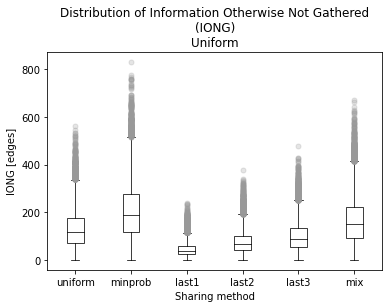

In [4]:
iongs_ = iongs[iongs["uniform"] > -1]
iongs_ = iongs_.drop(columns=["id"])
ax = sns.boxplot(data=iongs_, width=WIDTH, color="white", saturation=1.0,
    flierprops={"color":"k", "marker":"o", "markersize":5.0, "alpha":0.25})

plt.setp(ax.artists, edgecolor = 'k', facecolor='w', linewidth=0.75)
plt.setp(ax.lines, color='k', linewidth=0.75)

plt.title("Distribution of Information Otherwise Not Gathered\n(IONG)\nUniform")
plt.xlabel("Sharing method")
plt.ylabel("IONG [edges]")

In [5]:
iongs_.describe()

,uniform,minprob,last1,last2,last3,mix
count,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000
mean,7.977528,13.591760,6.846442,8.940075,9.940075,10.355805
std,7.439951,11.151807,5.855626,7.354872,8.422812,9.504886
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,5.000000,2.000000,3.000000,3.000000,3.000000
50%,6.000000,11.000000,5.000000,7.000000,8.000000,8.000000
75%,12.000000,19.000000,10.000000,13.000000,14.000000,15.000000
max,35.000000,72.000000,25.000000,31.000000,38.000000,55.000000


Text(0, 0.5, 'Incorrectness [edges]')

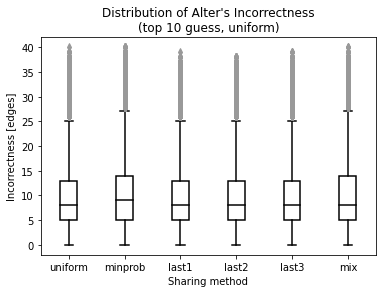

In [5]:
ax = sns.boxplot(x="method", y="Alter correctness", data=distances, color="white", width=WIDTH, saturation=0.8)
plt.setp(ax.artists, edgecolor = 'k', facecolor='w')
plt.setp(ax.lines, color='k')

plt.title("Distribution of Alter's Incorrectness\n(top 10 guess, uniform)")
plt.xlabel("Sharing method")
plt.ylabel("Incorrectness [edges]")

Text(0, 0.5, 'Gained correctness [edges]')

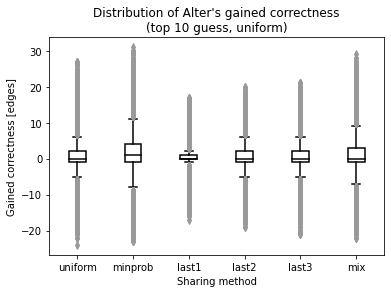

In [6]:
ax = sns.boxplot(x="method", y="Distance difference", data=distances, color="white", width=WIDTH, saturation=0.8)
plt.setp(ax.artists, edgecolor = 'k', facecolor='w')
plt.setp(ax.lines, color='k')

plt.title("Distribution of Alter's gained correctness\n(top 10 guess, uniform)")
plt.xlabel("Sharing method")
plt.ylabel("Gained correctness [edges]")

In [7]:
best_guesses = distances.iloc[[i%10 == 0 for i in range(len(distances))]]

Text(0, 0.5, 'Incorrectness [edges]')

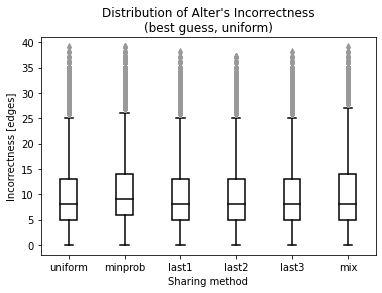

In [8]:
ax = sns.boxplot(x="method", y="Alter correctness", data=best_guesses, color="white", width=WIDTH, saturation=0.8)
plt.setp(ax.artists, edgecolor = 'k', facecolor='w')
plt.setp(ax.lines, color='k')

plt.title("Distribution of Alter's Incorrectness\n(best guess, uniform)")
plt.xlabel("Sharing method")
plt.ylabel("Incorrectness [edges]")

Text(0, 0.5, 'Gained correctness [edges]')

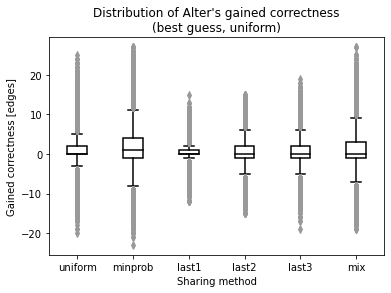

In [9]:
ax = sns.boxplot(x="method", y="Distance difference", data=best_guesses, color="white", width=0.35, saturation=0.8)
plt.setp(ax.artists, edgecolor = 'k', facecolor='w')
plt.setp(ax.lines, color='k')

plt.title("Distribution of Alter's gained correctness\n(best guess, uniform)")
plt.xlabel("Sharing method")
plt.ylabel("Gained correctness [edges]")

In [40]:
best_guesses.describe()

,id,Alter correctness\ndistance [m]
count,5640.000000,5640.000000
mean,247.269149,9.144149
std,142.446491,5.548698
min,1.000000,0.000000
25%,130.000000,5.000000
50%,240.000000,9.000000
75%,358.000000,12.000000
max,499.000000,30.000000


---
## **Summarizing multiple results**

In [6]:
uniforms = [["low_uniform/", "low traffic"],
            ["medium_uniform/", "medium traffic"],
            ["high_uniform/","high traffic"]]
stationaries = [["low/", "low traffic, stationary origin"],
                ["medium/", "medium traffic, stationary origin"],
                ["high/","high traffic, stationary origin"]]

In [7]:
#path:
RESULT_PATH = "../results/no_arteria/"

In [8]:
BASE_PATH = "../results/"
unif = "symmetric_"
stat = "asymmetric_"

In [9]:
measurement_cases = [("low/", "low traffic"),
                     ("medium/", "medium traffic"),
                     ("high/", "high traffic")]

In [7]:
#merging iongs dataframes
iongs = []
for case in measurement_cases:
    iong_unif = pd.read_csv(BASE_PATH + unif + case + "iong.csv")
    iong_stat = pd.read_csv(BASE_PATH + stat + case +"iong.csv")
    labels = ["symmetric" for x in range(len(iong_unif))] + ["asymmetric" for x in range(len(iong_stat))]
    iong_df = pd.concat([iong_unif, iong_stat])
    iong_df["route length"] = labels
    iongs.append(iong_df)

In [15]:
def load_distance_measurements(symm_file, asym_file):
    symm = open(symm_file, "r")
    asym = open(asym_file, "r")
    combined_file = open("_comb.csv", "w")
    combined_file.write("id,time,method,Alter correctness,Distance difference, route length\n")
    #reading symmetric file:
    symm.readline() #dropping header
    while True:
        line = symm.readline()
        if not line:
            break
        combined_file.write(line.strip() + ",symmetric\n")
    #reading asymmetric file:
    asym.readline() #dropping header
    while True:
        line = asym.readline()
        if not line:
            break
        combined_file.write(line.strip() + ",asymmetric\n")
    combined_file.close()
    asym.close()
    symm.close()
    return pd.read_csv("_comb.csv")

In [16]:
#collecting distance dataframes:
distances = []
for case in measurement_cases:
    distances = load_distance_measurements(BASE_PATH + unif + case[0] +  "distances.csv",
                                           BASE_PATH + stat + case[0] + "distances.csv")
    print(case[0])

low/
medium/
high/


In [7]:
methods = ["uniform", "minprob", "last1", "last2", "last3", "mix"]


In [65]:
iong_longs = []

for i in range(len(uniforms)):
    iong_long_method = []
    iong_long_value = []
    iong_long_route_length = []
    for _,r in iongs[i].iterrows():
        for method in methods:
            iong_long_method.append(method)
            iong_long_value.append(r[method])
            iong_long_route_length.append(r["route length"])

    iong_long = pd.DataFrame()
    iong_long["method"] = iong_long_method
    iong_long["value"] = iong_long_value
    iong_long["route length"] = iong_long_route_length
    iong_longs.append(iong_long)

Text(0, 0.5, 'IONG [edges]')

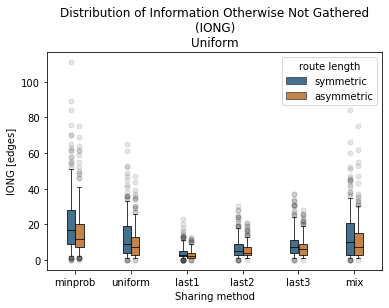

In [58]:
WIDTH = 0.3
WHIS = [5, 95]

iongs_ = iong_long[iong_long["value"]>-1.0]
ax = sns.boxplot(data=iongs_, width=WIDTH, x="method", y="value", hue="route length",  saturation=0.5,
    flierprops={"color":"k", "marker":"o", "markersize":5.0, "alpha":0.125}, whis=WHIS)

plt.setp(ax.artists, edgecolor = 'k',  linewidth=0.75)
plt.setp(ax.lines, color='k', linewidth=0.75)

plt.title("Distribution of Information Otherwise Not Gathered\n(IONG)\nUniform")
plt.xlabel("Sharing method")
plt.ylabel("IONG [edges]")

Text(0.5, 0, 'Sharing method')

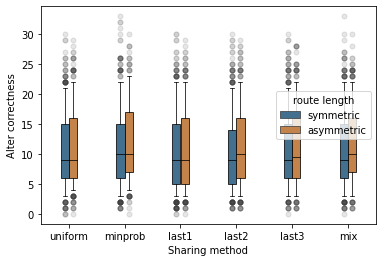

In [64]:
WIDTH = 0.3
WHIS = [5, 95]

best_guesses = distances[0].iloc[[i%10 == 0 for i in range(len(distances[0]))]]
ax = sns.boxplot(data=best_guesses, width=WIDTH, x="method", y="Alter correctness", hue="route length",  saturation=0.5,
    flierprops={"color":"k", "marker":"o", "markersize":5.0, "alpha":0.125}, whis=WHIS)

plt.setp(ax.artists, edgecolor = 'k',  linewidth=0.75)
plt.setp(ax.lines, color='k', linewidth=0.75)

#plt.title("Distribution of Information Otherwise Not Gathered\n(IONG)\nUniform")
plt.xlabel("Sharing method")
#plt.ylabel("IONG [edges]")

In [ ]:
WIDTH = 0.3
WHIS = [5, 95]

fig, ax = plt.subplots(2, 3, figsize=[14, 9])

for i, (case, label) in enumerate(measurement_cases):
    #IONGS:
    #load meas case:
    iong_unif = pd.read_csv(BASE_PATH + unif + case + "iong.csv")
    iong_stat = pd.read_csv(BASE_PATH + stat + case +"iong.csv")
    labels = ["symmetric" for x in range(len(iong_unif))] + ["asymmetric" for x in range(len(iong_stat))]
    iong_df = pd.concat([iong_unif, iong_stat])
    iong_df["route length"] = labels
    
    #changing data format:
    iong_long_method = []
    iong_long_value = []
    iong_long_route_length = []
    for _,r in iong_df.iterrows():
        for method in methods:
            iong_long_method.append(method)
            iong_long_value.append(r[method])
            iong_long_route_length.append(r["route length"])

    iong_long = pd.DataFrame()
    iong_long["method"] = iong_long_method
    iong_long["value"] = iong_long_value
    iong_long["route length"] = iong_long_route_length
    
    iongs_ = iong_long[iong_long["value"]>-1.0]
    ax[0,i] = sns.boxplot(data=iongs_, width=WIDTH, x="method", y="value", hue="route length",  saturation=0.5,
        flierprops={"color":"k", "marker":"o", "markersize":3.0, "alpha":0.0625}, whis=WHIS, ax=ax[0,i],
        order=methods)
    ax[0,i].set_title(label)
    plt.setp(ax[0,i].artists, edgecolor = 'k', linewidth=0.75)
    plt.setp(ax[0,i].lines, color='k', linewidth=0.75)
    if i==0:
        ax[0,i].set_ylabel("IONG\n[road segments]")
    else:
        ax[0,i].set_ylabel("")

    del(iong_long) #saving some memory
    
    #Incorrectness:
    #reading:
    dist_unif = pd.read_csv(BASE_PATH + unif + case +  "distances.csv")
    dist_stat = pd.read_csv(BASE_PATH + stat + case + "distances.csv")
    labels = ["symmetric" for x in range(len(dist_unif))] + ["asymmetric" for x in range(len(dist_stat))]
    dist_df = pd.concat([dist_unif, dist_stat])
    dist_df["route length"] = labels
    
    best_guesses = dist_df.iloc[[i%10 == 0 for i in range(len(dist_df))]]
    del(dist_df) #to save some memory
    ax[1,i] = sns.boxplot(data=best_guesses, width=WIDTH, x="method", y="Alter correctness", hue="route length",  saturation=0.5,
        flierprops={"color":"k", "marker":"o", "markersize":3.0, "alpha":0.0625}, whis=WHIS, ax=ax[1,i],
        order=methods)
    plt.setp(ax[1,i].artists, edgecolor = 'k',  linewidth=0.75)
    plt.setp(ax[1,i].lines, color='k', linewidth=0.75)
    if i==0:
        ax[1,i].set_ylabel("Alter's incorrectness\n[road segments]")
    else:
        ax[1,i].set_ylabel("")
    ax[1,i].set_ylim(-2, 42)
    
    ax[1,i].legend([], [], frameon=False)
    if i!=2:
        ax[0,i].legend([], [], frameon=False)

ax[0,2].legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Route length")

In [93]:
(len(distances_s)/120), len(distances_a)/120

(374.5, 259.0)

In [97]:
for i in range(3):
    distances_ = distances[i]
    distances_s = distances_[distances_["route length"] == "symmetric"]
    distances_a = distances_[distances_["route length"] == "asymmetric"]
    distances_s = distances_s[distances_s["method"]=="minprob"]
    distances_a = distances_a[distances_a["method"]=="minprob"]
    print(len(distances_s)/10, len(distances_a)/10)
    #print("symmetric:\t%d\t\tasymmetric:\t%d"%(len(distances_s)/120), len(distances_a)/120)

749.0 518.0
73090.0 26414.0
274827.0 216484.0


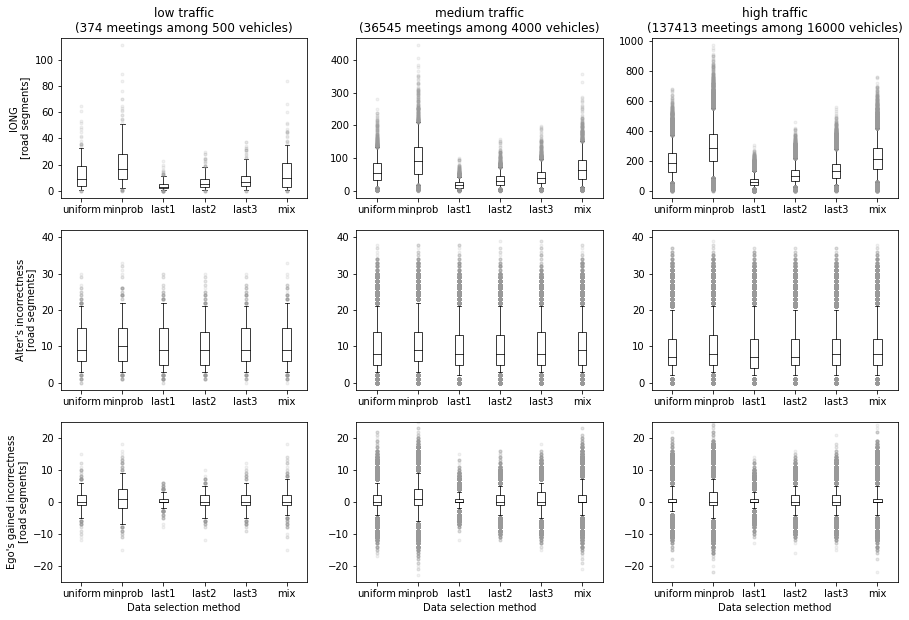

In [34]:
WIDTH = 0.2
WHIS = [5, 95]

fig, ax = plt.subplots(3, 3, figsize=[15, 10])

for i, (path_suffix, label) in enumerate(uniforms):
    #reading data:
    iongs = pd.read_csv(RESULT_PATH+path_suffix+"iong.csv")
    distances = pd.read_csv(RESULT_PATH+path_suffix+"distances.csv")
    meetings = len(distances)/120 #2 (symmetic meetings) * 6 (#methods) * 10(#points)
    vehicles = max(iongs["id"])+1
    
    #adding iongs subplot:
    iongs_ = iongs[iongs["uniform"] > -1]
    iongs_ = iongs_.drop(columns=["id"])
    ax[0,i] = sns.boxplot(data=iongs_, width=WIDTH, color="white", saturation=1.0, ax=ax[0,i],
        flierprops={"color":"k", "marker":"o", "markersize":3.0, "alpha":0.125}, whis=WHIS)

    plt.setp(ax[0,i].artists, edgecolor = 'k', facecolor='w', linewidth=0.75)
    plt.setp(ax[0,i].lines, color='k', linewidth=0.75)

    ax[0,i].set_title(label+"\n(%d meetings among %d vehicles)"%(meetings, vehicles))
    #ax[0,i].set_xlabel("Sharing method")
    if i==0:
        ax[0,i].set_ylabel("IONG\n[road segments]")

    ax[0,0].get_shared_y_axes().join(ax[0,0], ax[0,i])
        
    '''########################
    #top10 guesses:
    ax[1,i] = sns.boxplot(x="method", y="Alter correctness", data=distances, color="white", width=0.35, saturation=0.8, ax=ax[1,i])
    plt.setp(ax[1,i].artists, edgecolor = 'k', facecolor='w')
    plt.setp(ax[1,i].lines, color='k')

    if i==0:
        ax[1,i].set_ylabel("Incorrectness [edges]\ntop 10 guesses")
    ax[1,i].set_xlabel("")'''
    
    ########################
    #best guesses:
    best_guesses = distances.iloc[[i%10 == 0 for i in range(len(distances))]]
    ax[1,i] = sns.boxplot(x="method", y="Alter correctness", data=best_guesses, color="white", width=WIDTH, saturation=0.8, ax=ax[1,i],
        flierprops={"color":"k", "marker":"o", "markersize":3.0, "alpha":0.125}, whis=WHIS)
    plt.setp(ax[1,i].artists, edgecolor = 'k', facecolor='w', linewidth=0.75)
    plt.setp(ax[1,i].lines, color='k', linewidth=0.75)

    if i==0:
        ax[1,i].set_ylabel("Alter's incorrectness\n[road segments]")
    else:
        ax[1,i].set_ylabel("")
    ax[1,i].set_xlabel("")
    ax[1,i].set_ylim(-2, 42)
    
    ########################
    #Gained correctness:
    ax[2,i] = sns.boxplot(x="method", y="Distance difference", data=best_guesses, color="white", width=WIDTH, saturation=0.8, ax=ax[2,i],
        flierprops={"color":"k", "marker":"o", "markersize":3.0, "alpha":0.125}, whis=WHIS)
    plt.setp(ax[2,i].artists, edgecolor = 'k', facecolor='w', linewidth=0.75)
    plt.setp(ax[2,i].lines, color='k', linewidth=0.75)

    ax[2,i].set_xlabel("Data selection method")
    if i==0:
        ax[2,i].set_ylabel("Ego's gained incorrectness\n[road segments]")
    else:
        ax[2,i].set_ylabel("")
    ax[2,i].set_ylim(-25, 25)

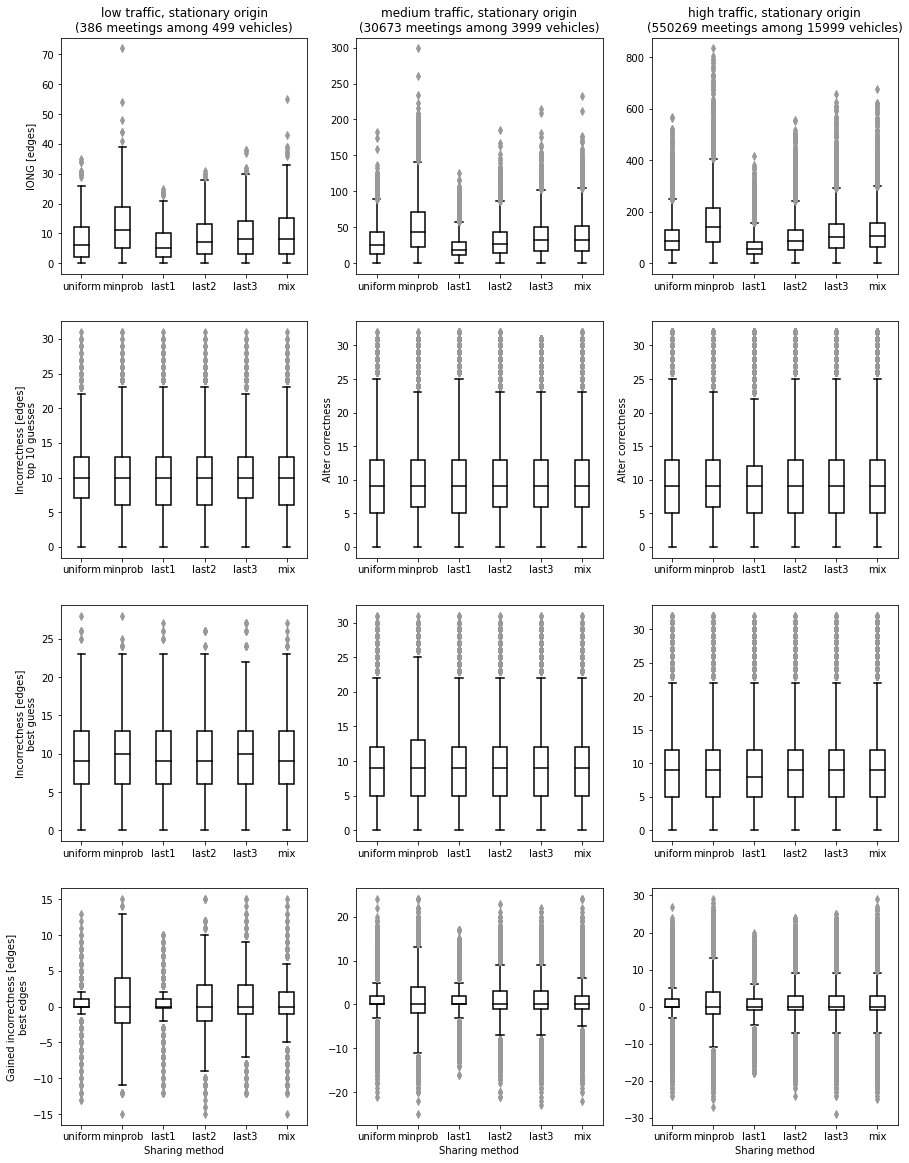

In [5]:
fig, ax = plt.subplots(4, 3, figsize=[15, 20])

for i, (path_suffix, label) in enumerate(stationaries):
    #reading data:
    iongs = pd.read_csv(RESULT_PATH+path_suffix+"iong.csv")
    distances = pd.read_csv(RESULT_PATH+path_suffix+"distances.csv")
    meetings = len(distances)/120 #2 (symmetic meetings) * 6 (#methods) * 10(#points)
    vehicles = max(iongs["id"])
    
    #adding iongs subplot:
    iongs_ = iongs[iongs["uniform"] > -1]
    iongs_ = iongs_.drop(columns=["id"])
    ax[0,i] = sns.boxplot(data=iongs_, width=WIDTH, color="white", saturation=1.0, ax=ax[0,i])

    plt.setp(ax[0,i].artists, edgecolor = 'k', facecolor='w')
    plt.setp(ax[0,i].lines, color='k')

    ax[0,i].set_title(label+"\n(%d meetings among %d vehicles)"%(meetings, vehicles))
    #ax[0,i].set_xlabel("Sharing method")
    if i==0:
        ax[0,i].set_ylabel("IONG [edges]")
        
    ########################
    #top10 guesses:
    ax[1,i] = sns.boxplot(x="method", y="Alter correctness", data=distances, color="white", width=WIDTH, saturation=0.8, ax=ax[1,i])
    plt.setp(ax[1,i].artists, edgecolor = 'k', facecolor='w')
    plt.setp(ax[1,i].lines, color='k')

    if i==0:
        ax[1,i].set_ylabel("Incorrectness [edges]\ntop 10 guesses")
    ax[1,i].set_xlabel("")
    
    ########################
    #best guesses:
    best_guesses = distances.iloc[[i%10 == 0 for i in range(len(distances))]]
    ax[2,i] = sns.boxplot(x="method", y="Alter correctness", data=best_guesses, color="white", width=WIDTH, saturation=0.8, ax=ax[2,i])
    plt.setp(ax[2,i].artists, edgecolor = 'k', facecolor='w')
    plt.setp(ax[2,i].lines, color='k')

    if i==0:
        ax[2,i].set_ylabel("Incorrectness [edges]\nbest guess")
    else:
        ax[2,i].set_ylabel("")
    ax[2,i].set_xlabel("")
    
    ########################
    #Gained correctness:
    ax[3,i] = sns.boxplot(x="method", y="Distance difference", data=best_guesses, color="white", width=WIDTH, saturation=0.8, ax=ax[3,i])
    plt.setp(ax[3,i].artists, edgecolor = 'k', facecolor='w')
    plt.setp(ax[3,i].lines, color='k')

    ax[3,i].set_xlabel("Sharing method")
    if i==0:
        ax[3,i].set_ylabel("Gained incorrectness [edges]\nbest edges")
    else:
        ax[3,i].set_ylabel("")

---

# **MIX investigations**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
WIDTH = 0.3

In [89]:
RESULT_BASE = "../results/"
TRAFFIC_LEVEL = ["low/", "medium/", "high/"]
FEEDING = ["asymmetric/", "symmetric/"]
CASES = ["mix1/", "mix2/", "mix3/",
         "mix12/", "mix13/", "mix23/",]
         #"mix123/"]

../results/high/symmetric/mix23/


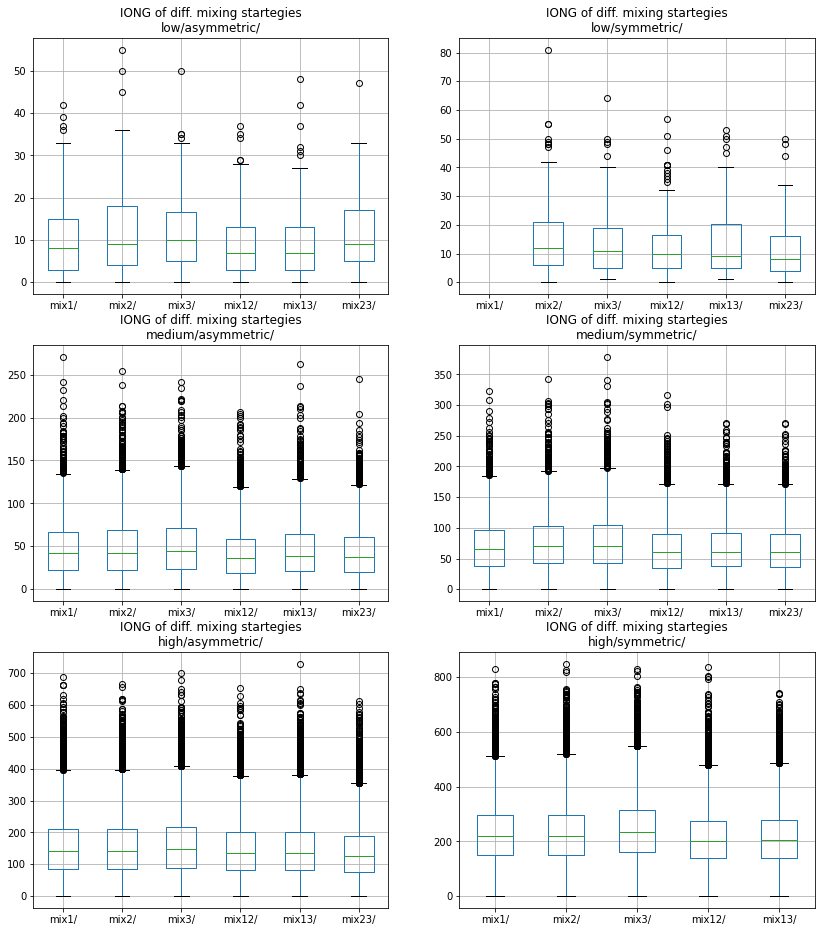

In [91]:
fig, axs = plt.subplots(len(TRAFFIC_LEVEL), len(FEEDING), figsize=[14, 16])
for i,t in enumerate(TRAFFIC_LEVEL):
    for j,f in enumerate(FEEDING):
        plot_df = pd.DataFrame()
        for c in CASES:
            path = RESULT_BASE+t+f+c
            try:
                #plot_df[c]=[np.None]
                iong_df = pd.read_csv(path+"iong.csv")
                iong_df = iong_df[iong_df["mix"]>-1]
                iong_df = iong_df["mix"]
                plot_df[c] = iong_df
                
            except:
                print(path)

        plot_df.boxplot(ax=axs[i,j])#, labels=plot_df.columns)
        axs[i,j].set_title("IONG of diff. mixing startegies\n"+t+f)
        

In [ ]:
plot_df = pd.DataFrame()
fig, axs = plt.subplots(len(TRAFFIC_LEVEL), len(FEEDING), figsize=[14, 11])
for i,t in enumerate(TRAFFIC_LEVEL):
    for j,f in enumerate(FEEDING):
        for c in CASES:
            path = RESULT_BASE+t+f+c
            print(path)
            dist_df = pd.read_csv(path+"distances.csv", encoding="latin-1")
            dist_df = dist_df[dist_df["method"]=="mix"]["Alter correctness"]
            plot_df[c] = dist_df.iloc[[i%10 == 0 for i in range(len(dist_df))]]

        axs[i,j].boxplot(plot_df, labels=plot_df.columns)
        axs[i,j].set_title("Alter incorrectness of diff. mixing startegies\n"+t+f)

../results/low/asymmetric/mix1/
../results/low/asymmetric/mix2/
../results/low/asymmetric/mix3/
../results/low/asymmetric/mix12/
../results/low/asymmetric/mix13/
../results/low/asymmetric/mix23/
../results/low/symmetric/mix1/
../results/low/symmetric/mix2/
../results/low/symmetric/mix3/
../results/low/symmetric/mix12/
../results/low/symmetric/mix13/
../results/low/symmetric/mix23/
../results/medium/asymmetric/mix1/
../results/medium/asymmetric/mix2/
../results/medium/asymmetric/mix3/
../results/medium/asymmetric/mix12/
../results/medium/asymmetric/mix13/
../results/medium/asymmetric/mix23/
../results/medium/symmetric/mix1/
../results/medium/symmetric/mix2/
../results/medium/symmetric/mix3/
../results/medium/symmetric/mix12/
../results/medium/symmetric/mix13/
../results/medium/symmetric/mix23/
../results/high/asymmetric/mix1/
../results/high/asymmetric/mix2/
../results/high/asymmetric/mix3/
../results/high/asymmetric/mix12/
../results/high/asymmetric/mix13/
../results/high/asymmetric/mi

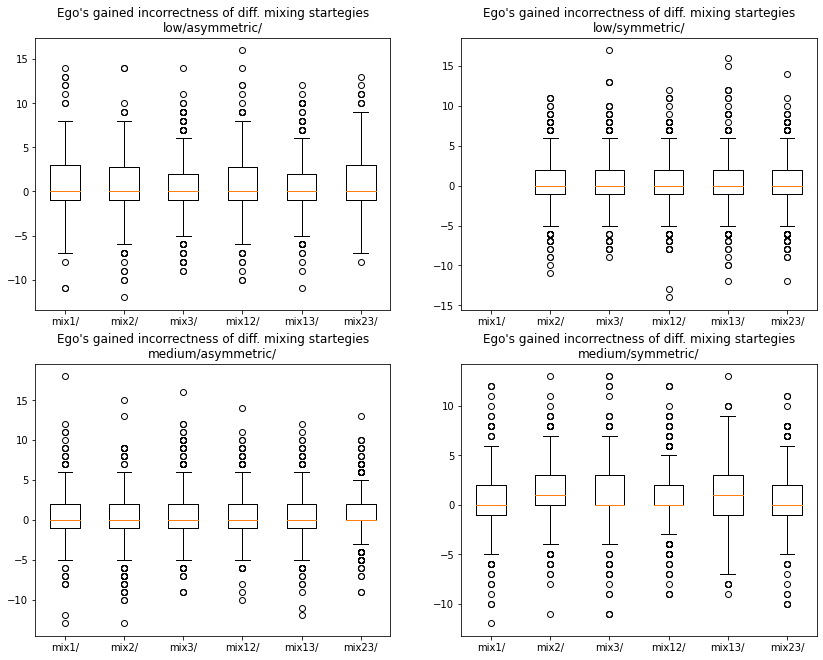

In [61]:
plot_df = pd.DataFrame()
fig, axs = plt.subplots(len(TRAFFIC_LEVEL), len(FEEDING), figsize=[14, 11])
for i,t in enumerate(TRAFFIC_LEVEL):
    for j,f in enumerate(FEEDING):
        for c in CASES:
            path = RESULT_BASE+t+f+c
            dist_df = pd.read_csv(path+"distances.csv")
            dist_df = dist_df[dist_df["method"]=="mix"]["Distance difference"]
            plot_df[c] = dist_df.iloc[[i%10 == 0 for i in range(len(dist_df))]]

        axs[i,j].boxplot(plot_df, labels=plot_df.columns)
        axs[i,j].set_title("Ego's gained incorrectness of diff. mixing startegies\n"+t+f)